In [17]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

tokenizer = GPT2Tokenizer.from_pretrained("gpt2", output_attentions=True)
model = GPT2LMHeadModel.from_pretrained("gpt2")

prompt = "Once upon a time, there was a dragon who"
input_ids = tokenizer.encode(prompt, return_tensors="pt")
output = model.generate(input_ids, max_length=50, num_return_sequences=1)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In [3]:
print(tokenizer.decode(output[0], skip_special_tokens=True))

Once upon a time, there was a dragon who was a little bit like a dragon.

"I'm not sure if it's a dragon or not, but it's a dragon. It's a dragon that's been living in the forest


In [8]:
output_high_temp = model.generate(input_ids, max_length=50, temperature=1.5, num_return_sequences=1)
output_low_temp = model.generate(input_ids, max_length=50, temperature=0.5, num_return_sequences=1)

print("HIGH TEMPERATURE:\n", tokenizer.decode(output_high_temp[0], skip_special_tokens=True))
print("LOW TEMPERATURE:\n", tokenizer.decode(output_low_temp[0], skip_special_tokens=True))


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


HIGH TEMPERATURE:
 Once upon a time, there was a dragon who was a little bit like a dragon.

"I'm not sure if it's a dragon or not, but it's a dragon. It's a dragon that's been living in the forest
LOW TEMPERATURE:
 Once upon a time, there was a dragon who was a little bit like a dragon.

"I'm not sure if it's a dragon or not, but it's a dragon. It's a dragon that's been living in the forest


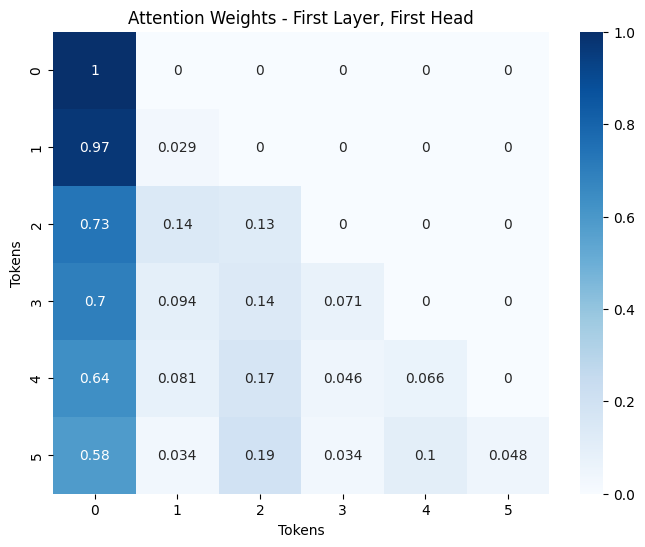

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


inputs = tokenizer("Hello, how are you?", return_tensors="pt")
outputs = model(**inputs)

# Tokenize input text
input_text = "Hello, how are you?"
inputs = tokenizer(input_text, return_tensors="pt")

# Get model outputs (including attentions)
with torch.no_grad():
    outputs = model(**inputs, output_attentions=True)

attentions = outputs.attentions[0].squeeze(0).cpu().detach().numpy()

# First attention head
attention_matrix = attentions[0, :, :]  

plt.figure(figsize=(8, 6))
sns.heatmap(attention_matrix, cmap="Blues", annot=True)
plt.title("Attention Weights - First Layer, First Head")
plt.xlabel("Tokens")
plt.ylabel("Tokens")
plt.show()

